<a href="https://colab.research.google.com/github/chaimaagassir/Python-projects/blob/main/search_local_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx

n = 20                     # number of cities
G = nx.complete_graph(20)  # graph with a vertex for each city

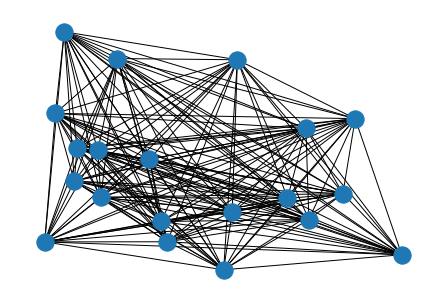

In [2]:
# for convenience, pick the city (x,y)-coordinates at random
import random

my_pos = { i : ( random.random(), random.random() ) for i in G.nodes } # pos[i] = (x_i, y_i)
nx.draw(G, pos=my_pos)

In [3]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[(19, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19)]


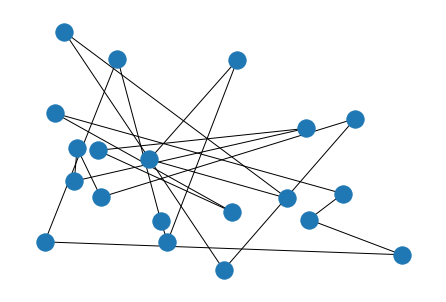

In [33]:
# Pick an arbitrary tour, in this case (0,1,2,...,n-1)
tour = list(G.nodes)
tour_edges = [( tour[i-1] , tour[i] ) for i in range(n)]
print(tour)
print(tour_edges)
nx.draw( G.edge_subgraph(tour_edges), pos=my_pos )

In [38]:
# code the 2-opt heuristic
#tour : 1-2-3-4-5-6-7-8-9

#consider two edges:
#      3-4
#      6-7
#deleting them gives:
#  1-2-3  4-5-6  7-8-9
#add these edges(?):
#     3-6   
#     4-7
#giving new tour:
#  1-2-3-6-5-4-7-8-9
import matplotlib.pyplot as plt

improved = True
while improved:
  improved = False
  for i in range(n):
   for j in range(i+1,n):
    #two current adges from our tour
    cur1 = ( tour[i] , tour[i+1])
    cur2 = ( tour[j], tour[(j+1)%n])
    cur_length = G.edges[cur1]['length'] + G.edges[cur2]['length']
    #two new edges for the tour
    new1 = (tour[i], tour[j])
    new2 = (tour[i+1], tour[(j+1)%n])
    new_length = G.edges[new1]['length'] + G.edges[new2]['length']

    if new_length < cur_length:
      improved = True
      print("swap edges",cur1,cur2,"with",new1,new2)
      tour[i+1:j+1] = tour[i+1:j+1][::-1]
      #draw the tour
      plt.figure()
      nx.draw( G.edge_subgraph(tour_edges), pos=my_pos )